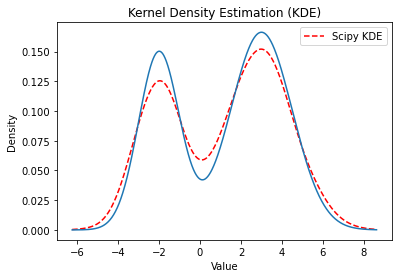

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import norm


n0 = 300
n1 = 500


# Generate synthetic data (e.g., from a bimodal distribution)
np.random.seed(42)
data1 = np.random.normal(loc=-2, scale=1, size=n0)  # First peak
data2 = np.random.normal(loc=3, scale=1.5, size=n1) # Second peak
data = np.concatenate([data1, data2])

x_vals = np.linspace(min(data)-1, max(data)+1, 1000)


pdf1  = norm.pdf(x_vals, loc = -2, scale = 1)
pdf2 = norm.pdf(x_vals, loc = 3, scale = 1.5)

y = pdf1 * n0 /(n0+n1) + pdf2 * n1 / (n0 + n1)

# Compute KDE using seaborn
# sns.kdeplot(data, fill=True, color='blue', label="Seaborn KDE")

# Compute KDE using scipy and plot manually
kde = gaussian_kde(data, bw_method='scott')  # Bandwidth selection using 'scott' rule
plt.plot(x_vals, kde(x_vals), label="Scipy KDE", linestyle="dashed", color='red')

plt.plot(x_vals, y)

# Plot histogram for comparison
# plt.hist(data, bins=30, density=True, alpha=0.3, color="gray", label="Histogram")

# Show plot
plt.legend()
plt.title("Kernel Density Estimation (KDE)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


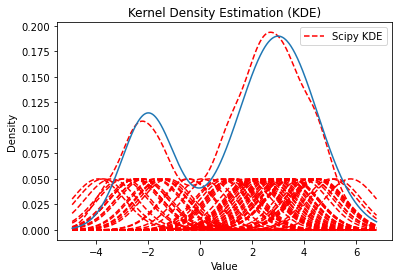

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import norm


n0 = 20
n1 = 50


# Generate synthetic data (e.g., from a bimodal distribution)
np.random.seed(42)
data1 = np.random.normal(loc=-2, scale=1, size=n0)  # First peak
data2 = np.random.normal(loc=3, scale=1.5, size=n1) # Second peak
data = np.concatenate([data1, data2])

x_vals = np.linspace(min(data)-1, max(data)+1, 1000)


pdf1  = norm.pdf(x_vals, loc = -2, scale = 1)
pdf2 = norm.pdf(x_vals, loc = 3, scale = 1.5)

y = pdf1 * n0 /(n0+n1) + pdf2 * n1 / (n0 + n1)

bandwidth = 1
for d in data:
    kernel = norm(loc=d, scale=bandwidth).pdf(x_vals)
    plt.plot(x_vals, kernel / kernel.max() * 0.05, 'r--')  # Normalize height for visualization

# Compute KDE using seaborn
# sns.kdeplot(data, fill=True, color='blue', label="Seaborn KDE")

# Compute KDE using scipy and plot manually
kde = gaussian_kde(data, bw_method=.2)  # Bandwidth selection using 'scott' rule
plt.plot(x_vals, kde(x_vals), label="Scipy KDE", linestyle="dashed", color='red')

plt.plot(x_vals, y)

# Plot histogram for comparison
# plt.hist(data, bins=30, density=True, alpha=0.3, color="gray", label="Histogram")

# Show plot
plt.legend()
plt.title("Kernel Density Estimation (KDE)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


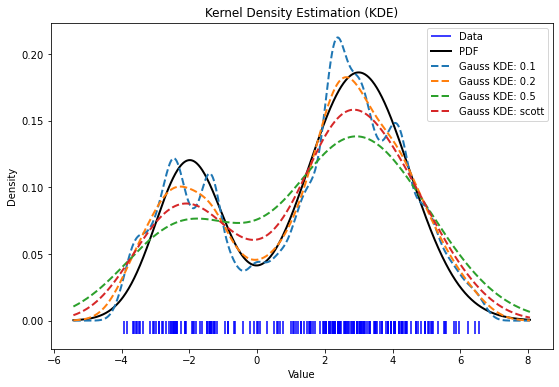

In [12]:
n0 = 30 *2
n1 = 70 *2


# Generate synthetic data (e.g., from a bimodal distribution)
np.random.seed(54)
data1 = np.random.normal(loc=-2, scale=1, size=n0)  # First peak
data2 = np.random.normal(loc=3, scale=1.5, size=n1) # Second peak
data = np.concatenate([data1, data2])

x_vals = np.linspace(min(data)-1.5, max(data)+1.5, 1000)


pdf1  = norm.pdf(x_vals, loc = -2, scale = 1)
pdf2 = norm.pdf(x_vals, loc = 3, scale = 1.5)

y = pdf1 * n0 /(n0+n1) + pdf2 * n1 / (n0 + n1)


# Compute KDE using seaborn
# sns.kdeplot(data, fill=True, color='blue', label="Seaborn KDE")

# Compute KDE using scipy and plot manually


plt.figure(figsize=(9,6))

plt.vlines(data, ymin=-.01, ymax=0.00, color='blue',label="Data")  # Rug lines
plt.plot(x_vals, y, color = "black", label = "PDF", linewidth = "2")


bandwidths = [.1, .2, .5, 'scott']
for b in bandwidths:
    kde = gaussian_kde(data, bw_method=b)  # Bandwidth selection using 'scott' rule
    # kde = gaussian_kde(data, bw_method='scott')  # Bandwidth selection using 'scott' rule

    plt.plot(x_vals, kde(x_vals), label="Gauss KDE: " + str(b), linestyle="dashed", linewidth= 2)


# Plot histogram for comparison
# plt.hist(data, bins=30, density=True, alpha=0.3, color="gray", label="Histogram")

# Show plot
plt.legend()
plt.title("Kernel Density Estimation (KDE)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.rcParams['axes.facecolor'] = 'white'
plt.show()


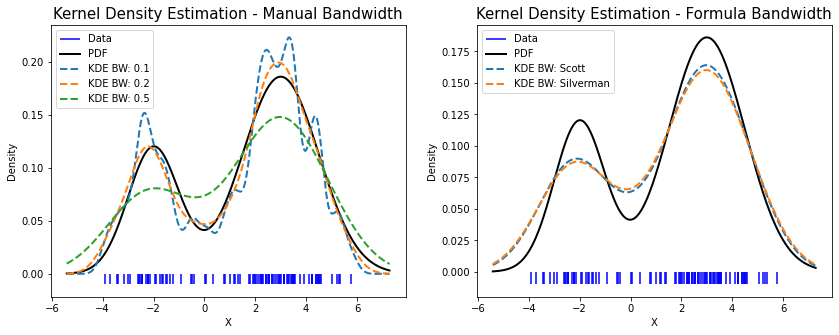

In [20]:
n0 = 30 
n1 = 70 


# Generate synthetic data (e.g., from a bimodal distribution)
np.random.seed(42)
data1 = np.random.normal(loc=-2, scale=1, size=int(n0))  # First peak
data2 = np.random.normal(loc=3, scale=1.5, size=int(n1)) # Second peak
data = np.concatenate([data1, data2])

x_vals = np.linspace(min(data)-1.5, max(data)+1.5, 1000)


pdf1  = norm.pdf(x_vals, loc = -2, scale = 1)
pdf2 = norm.pdf(x_vals, loc = 3, scale = 1.5)

y = pdf1 * n0 /(n0+n1) + pdf2 * n1 / (n0 + n1)


# Compute KDE using seaborn
# sns.kdeplot(data, fill=True, color='blue', label="Seaborn KDE")

# Compute KDE using scipy and plot manually


fig, axs = plt.subplots(1, 2, figsize= (14, 5))


bandwidths = [[.1, .2, .5,], ['scott', 'silverman']]


for i in range(2):
    ax = axs[i]
    bws = bandwidths[i]



    ax.vlines(data, ymin=-.01, ymax=0.00, color='blue',label="Data")  # Rug lines
    ax.plot(x_vals, y, color = "black", label = "PDF", linewidth = "2")


    for b in bws:
        kde = gaussian_kde(data, bw_method=b)  # Bandwidth selection using 'scott' rule
        # kde = gaussian_kde(data, bw_method='scott')  # Bandwidth selection using 'scott' rule

        ax.plot(x_vals, kde(x_vals), label="KDE BW: " + str(b).capitalize(), linestyle="dashed", linewidth= 2)


    ax.set_xlabel("X")
    ax.set_ylabel("Density")

    # Plot histogram for comparison
    # plt.hist(data, bins=30, density=True, alpha=0.3, color="gray", label="Histogram")

    # Show plot
    ax.legend(loc = 'upper left')
# plt.title("Stuff")


axs[0].set_title("Kernel Density Estimation - Manual Bandwidth", fontsize = 15)
axs[1].set_title("Kernel Density Estimation - Formula Bandwidth", fontsize = 15)

plt.rcParams['axes.facecolor'] = 'white'
plt.show()


In [14]:
# Define uniform kernel function
def uniform_kde(x, data, bandwidth):
    """ Compute KDE using a uniform (box) kernel """
    n = len(data)
    density = np.zeros_like(x)
    
    for d in data:
        density += (np.abs(x - d) <= bandwidth / 2).astype(float)  # Uniform window
    
    return density / (n * bandwidth)  # Normalize

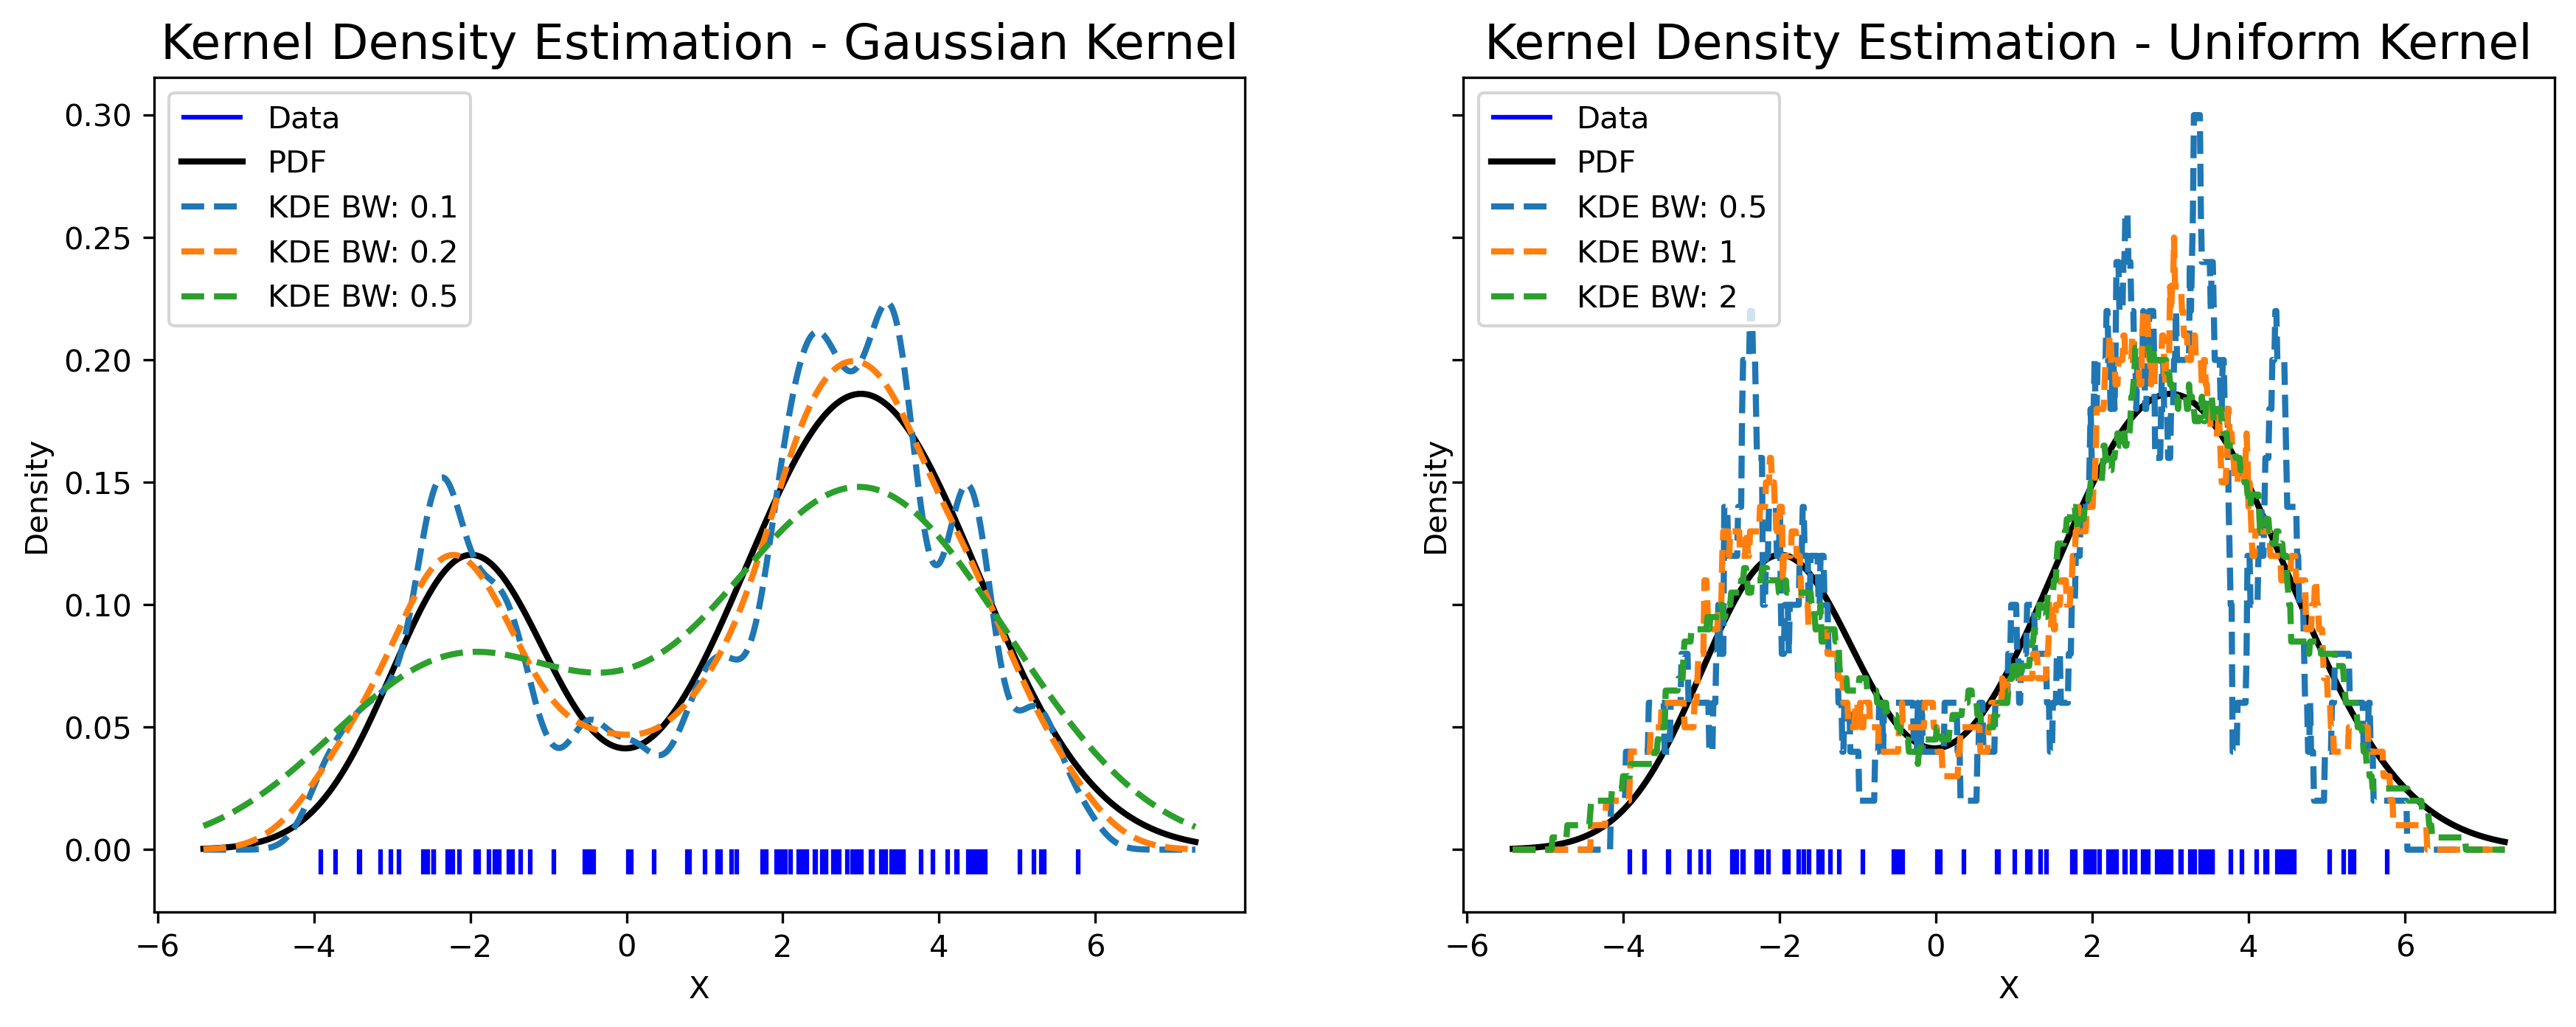

In [18]:
n0 = 30 
n1 = 70 


# Generate synthetic data (e.g., from a bimodal distribution)
np.random.seed(42)
data1 = np.random.normal(loc=-2, scale=1, size=int(n0))  # First peak
data2 = np.random.normal(loc=3, scale=1.5, size=int(n1)) # Second peak
data = np.concatenate([data1, data2])

x_vals = np.linspace(min(data)-1.5, max(data)+1.5, 1000)


pdf1  = norm.pdf(x_vals, loc = -2, scale = 1)
pdf2 = norm.pdf(x_vals, loc = 3, scale = 1.5)

y = pdf1 * n0 /(n0+n1) + pdf2 * n1 / (n0 + n1)


# Compute KDE using seaborn
# sns.kdeplot(data, fill=True, color='blue', label="Seaborn KDE")

# Compute KDE using scipy and plot manually


fig, axs = plt.subplots(1, 2, figsize= (14, 5), sharey= True, dpi = 300)


# bandwidths = [[.1, .2, .5,], ['scott', 'silverman']]
bandwidths = [[.1, .2, .5,], [.5,  1, 2]]

# bandwidths = [.1, .2, .5,]


for i in range(2):
    ax = axs[i]
    bws = bandwidths[i]



    ax.vlines(data, ymin=-.01, ymax=0.00, color='blue',label="Data")  # Rug lines
    ax.plot(x_vals, y, color = "black", label = "PDF", linewidth = "2")


    for b in bws:
        if i == 0:
            kde = gaussian_kde(data, bw_method=b)  # Bandwidth selection using 'scott' rule
            ax.plot(x_vals, kde(x_vals), label="KDE BW: " + str(b).capitalize(), linestyle="dashed", linewidth= 2)

        else:
            kde = uniform_kde(x_vals, data, b)
            ax.plot(x_vals, kde, label="KDE BW: " + str(b).capitalize(), linestyle="dashed", linewidth= 2)

        # kde = gaussian_kde(data, bw_method='scott')  # Bandwidth selection using 'scott' rule

    ax.set_xlabel("X")
    ax.set_ylabel("Density")

    # Plot histogram for comparison
    # plt.hist(data, bins=30, density=True, alpha=0.3, color="gray", label="Histogram")

    # Show plot
    ax.legend(loc = 'upper left')
# plt.title("Stuff")


axs[0].set_title("Kernel Density Estimation - Gaussian Kernel", fontsize = 16)
axs[1].set_title("Kernel Density Estimation - Uniform Kernel", fontsize = 16)

plt.rcParams['axes.facecolor'] = 'white'
plt.show()


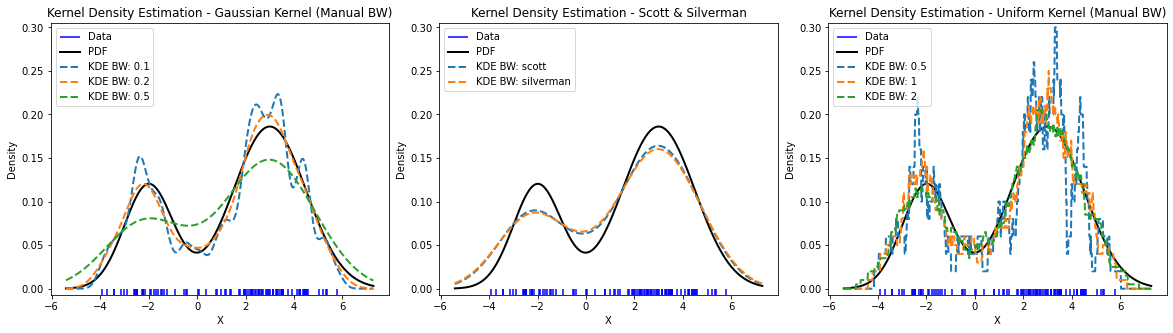

In [ ]:
np.random.seed(42)

data1 = np.random.normal(loc=-2, scale=1, size=int(n0))  # First peak
data2 = np.random.normal(loc=3, scale=1.5, size=int(n1)) # Second peak
data = np.concatenate([data1, data2])

x_vals = np.linspace(min(data)-1.5, max(data)+1.5, 1000)

pdf1 = norm.pdf(x_vals, loc=-2, scale=1)
pdf2 = norm.pdf(x_vals, loc=3, scale=1.5)

y = pdf1 * n0 / (n0 + n1) + pdf2 * n1 / (n0 + n1)

fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=False)
# fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

bandwidths = [[.1, .2, .5], ['scott', 'silverman'], [.5, 1, 2]]

for i in range(3):
    ax = axs[i]
    bws = bandwidths[i]
    
    ax.vlines(data, ymin=-.01, ymax=0.00, color='blue', label="Data")  # Rug lines
    ax.plot(x_vals, y, color="black", label="PDF", linewidth=2)
    
    for b in bws:
        if i < 2:
            kde = gaussian_kde(data, bw_method=b)
            ax.plot(x_vals, kde(x_vals), label=f"KDE BW: {b}", linestyle="dashed", linewidth=2)
        else:
            kde = uniform_kde(x_vals, data, b)
            ax.plot(x_vals, kde, label="KDE BW: " + str(b).capitalize(), linestyle="dashed", linewidth= 2)
    
    ax.set_xlabel("X")
    ax.set_ylabel("Density")
    ax.legend(loc='upper left')
    ax.set_ylim((-0.007,.305))

axs[0].set_title("Kernel Density Estimation - Gaussian Kernel (Manual BW)")
axs[2].set_title("Kernel Density Estimation - Uniform Kernel (Manual BW)")
axs[1].set_title("Kernel Density Estimation - Scott & Silverman")
plt.rcParams['axes.facecolor'] = 'white'

plt.subplots_adjust(wspace=0.15)
plt.show()